In [6]:
import numpy as np 
import pandas as pd 

import tensorflow as tf
from tensorflow import keras 

In [4]:
print (tf.__version__)

2.11.0


In [8]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [11]:
(train_image, train_labels), (test_image, test_labels) =fashion_mnist.load_data()

In [14]:
print (train_image.shape)
print (test_image.shape)
print (train_labels.shape)
print (test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

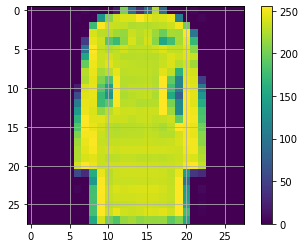

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[500])
plt.colorbar()
plt.grid(True)
plt.show()

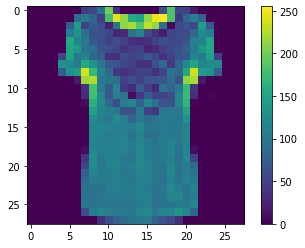

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[5001])
plt.colorbar()
plt.grid(False)
plt.show()

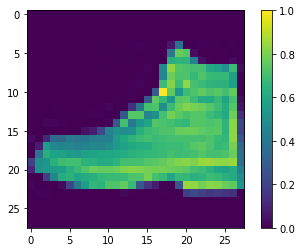

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[50000])
plt.colorbar()
plt.grid(False)
plt.show()

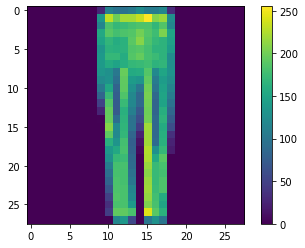

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[5090])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
# Mandatory Steps - data normalisation - min_max approach
train_image = train_image/255.0
test_image =test_image/255.0

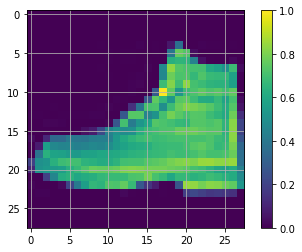

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[50000])
plt.colorbar()
plt.grid(True)
plt.show()

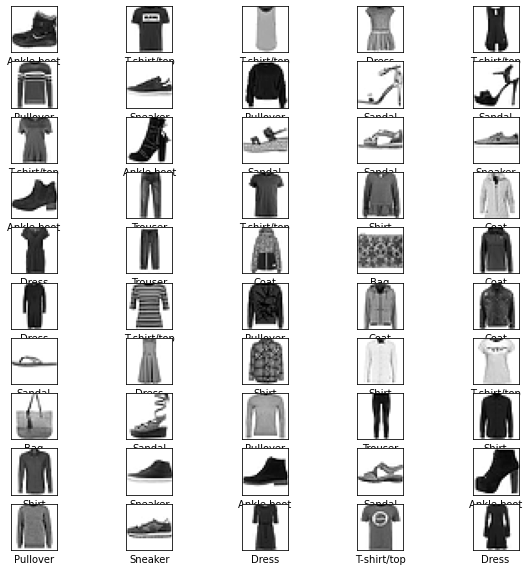

In [34]:
plt.figure(figsize= (10,10))
for i in range (50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_image[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    
    
    
    

# Building DNN model  (Multilayer perceptron)

In [37]:
tf.random.set_seed(100)
tf.keras.backend.clear_session()

model = None

model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                        keras.layers.Dense(128, activation = 'relu'),
                        keras.layers.Dense(10)])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

In [40]:
model.fit(train_image, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4985 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3753 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3375 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3124 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2951 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2817 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2676 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2568 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2454 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.23

In [41]:
model.fit(train_image, train_labels, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2311 - accuracy: 0.9142
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2232 - accuracy: 0.9174
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2162 - accuracy: 0.9189
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2091 - accuracy: 0.9228
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2035 - accuracy: 0.9235
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1994 - accuracy: 0.9244
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1921 - accuracy: 0.9280
Epoch 8/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1862 - accuracy: 0.9295
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1817 - accuracy: 0.9324
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss:

# MNIST digit classfification dataset

In [43]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [44]:
trainX.shape

(60000, 28, 28)

In [45]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes = 10)
testY = tf.keras.utils.to_categorical(testY, num_classes = 10)

# Building DNN model (Multilayer perceptron)

In [59]:
model1 = tf.keras.models.Sequential()
# reshape 2D to 1D : 28*28 = 784
model1.add(tf.keras.layers.Reshape((784,),input_shape= (28,28,)))
# normalize the dataset
model1.add(tf.keras.layers.BatchNormalization())
# add hidden layer
model1.add(tf.keras.layers.Dense(20, activation = 'relu'))
model1.add(tf.keras.layers.Dense(20, activation = 'relu'))
# output
model1.add(tf.keras.layers.Dense(10, activation = 'softmax'))
# compile
model1.compile(optimizer='sgd', loss= 'categorical_crossentropy', metrics = 'accuracy' )


In [55]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 784)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 20)                15700     
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
Total params: 19,466
Trainable params: 17,898
Non-trainable params: 1,568
______________________________________________

In [60]:
model1.fit(trainX, trainY, batch_size = 30, epochs = 20, validation_data = (testX,testY))

Epoch 1/20
2000/2000 [==============================] - 9s 4ms/step - loss: 0.6504 - accuracy: 0.8017 - val_loss: 0.3698 - val_accuracy: 0.9046
Epoch 2/20
2000/2000 [==============================] - 9s 4ms/step - loss: 0.3027 - accuracy: 0.9079 - val_loss: 0.3160 - val_accuracy: 0.9209
Epoch 3/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2562 - accuracy: 0.9218 - val_loss: 0.3230 - val_accuracy: 0.9323
Epoch 4/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2321 - accuracy: 0.9288 - val_loss: 0.2942 - val_accuracy: 0.9357
Epoch 5/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2139 - accuracy: 0.9348 - val_loss: 0.2640 - val_accuracy: 0.9385
Epoch 6/20
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2014 - accuracy: 0.9391 - val_loss: 0.3290 - val_accuracy: 0.9444
Epoch 7/20
2000/2000 [==============================] - 11s 5ms/step - loss: 0.1900 - accuracy: 0.9421 - val_loss: 0.2945 - val_accuracy